In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [5]:
def prepare_image(file):
    img_path = 'd:/jupyter/images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


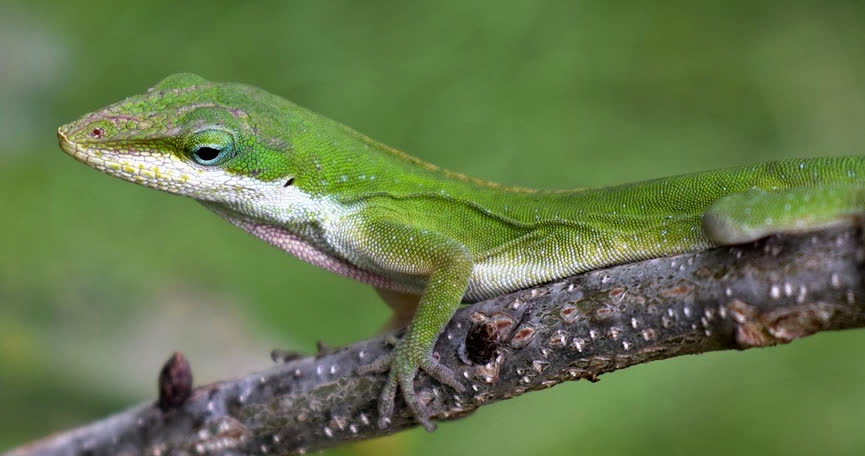

In [6]:
from IPython.display import Image
Image(filename='d:/jupyter/images/2.png')


In [7]:
preprocessed_image = prepare_image('2.png')
predictions = mobile.predict(preprocessed_image)


In [8]:
results = imagenet_utils.decode_predictions(predictions)

In [9]:
results

[[('n01682714', 'American_chameleon', 0.6527445),
  ('n01693334', 'green_lizard', 0.18943556),
  ('n01687978', 'agama', 0.13799551),
  ('n01689811', 'alligator_lizard', 0.013600872),
  ('n01688243', 'frilled_lizard', 0.0043154596)]]

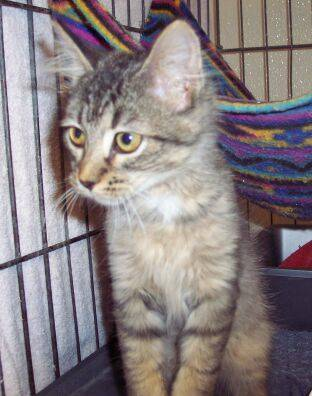

In [10]:
from IPython.display import Image
Image(filename='d:/jupyter/images/cat.2.jpg')


In [11]:
preprocessed_image = prepare_image('cat.2.jpg')
predictions = mobile.predict(preprocessed_image)

In [12]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02124075', 'Egyptian_cat', 0.47891057),
  ('n02123045', 'tabby', 0.47890097),
  ('n02123159', 'tiger_cat', 0.020923119),
  ('n02127052', 'lynx', 0.011377917),
  ('n02123394', 'Persian_cat', 0.00634871)]]

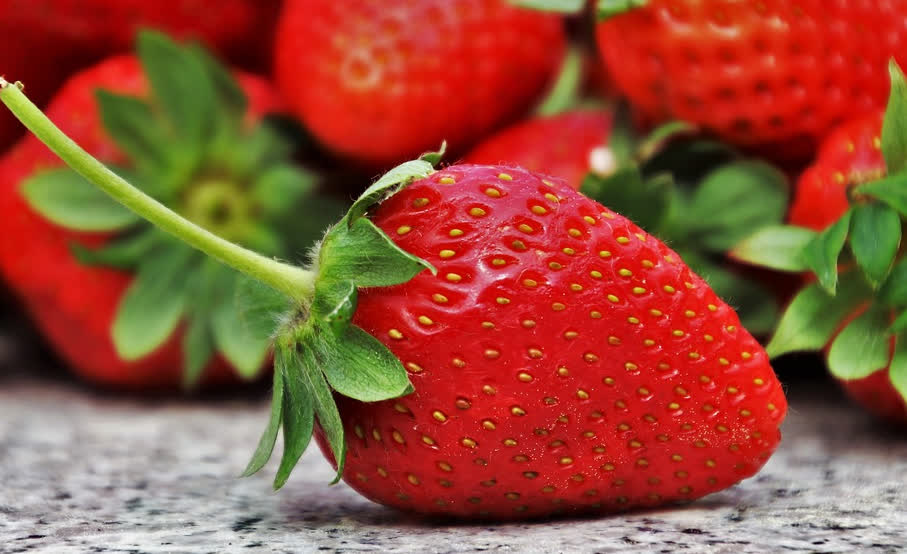

In [13]:
from IPython.display import Image
Image(filename='d:/jupyter/images/3.jpg')


In [14]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99999356),
  ('n07749582', 'lemon', 1.243187e-06),
  ('n07747607', 'orange', 8.595206e-07),
  ('n07753275', 'pineapple', 8.273997e-07),
  ('n07768694', 'pomegranate', 6.2611474e-07)]]

### Sign Language dataset

In [16]:
os.chdir('d:/jupyter/images/datasets/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('d:/jupyter/images/datasets/Sign-Language-Digits-Dataset/..')


In [17]:
train_path = 'd:/jupyter/images/datasets/Sign-Language-Digits-Dataset/train'
valid_path = 'd:/jupyter/images/datasets/Sign-Language-Digits-Dataset/valid'
test_path = 'd:/jupyter/images/datasets/Sign-Language-Digits-Dataset/test'


In [18]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, 
    target_size=(224, 224), 
    batch_size=10
    )

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, 
    target_size=(224, 224), 
    batch_size=10
    )

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, 
    target_size=(224, 224), 
    batch_size=10, shuffle=False
    )


Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [33]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10
